# SV Data Analysis

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os, sys
sys.path.insert(0, '/Users/jocelynornelasmunoz/Desktop/structural_variants/lib')
sys.path.insert(0, '/Users/jocelynornelas/iCloud Drive (Archive)/Desktop/UC Merced/Research/structural_variants/lib')
DATA_PATH='/Users/jocelynornelasmunoz/Desktop/structural_variants/data/simulated/4p_4c_coverage'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn import metrics
import confusion_matrix as confmat

# Define function to plot ROC curves

In [3]:
def plot_ROC(path):
    data = json.loads(open(path).read())
    fhat_SPIRAL = np.array(data['fhat_SPIRAL'])
    fhat_NEBULA = np.array(data['fhat_NEBULA'])
    f_true = np.array(data['f_true'])
    fpr_SPIRAL, tpr_SPIRAL, thresholds_SPIRAL = metrics.roc_curve(f_true, fhat_SPIRAL, pos_label=1)
    fpr_NEBULA, tpr_NEBULA, thresholds_NEBULA = metrics.roc_curve(f_true, fhat_NEBULA, pos_label=1)
    roc_auc_SPIRAL = metrics.auc(fpr_SPIRAL, tpr_SPIRAL)
    roc_auc_NEBULA = metrics.auc(fpr_NEBULA, tpr_NEBULA)
    display_SPIRAL = metrics.RocCurveDisplay(fpr=fpr_SPIRAL, tpr=tpr_SPIRAL, roc_auc=roc_auc_SPIRAL, estimator_name='SPIRAL')
    display_NEBULA = metrics.RocCurveDisplay(fpr=fpr_NEBULA, tpr=tpr_NEBULA, roc_auc=roc_auc_NEBULA, estimator_name='NEBULA')
    display_SPIRAL.plot()
    display_NEBULA.plot()
    plt.show()

# Plot results

In [4]:
laptop_path = '/Users/jocelynornelas/iCloud Drive (Archive)/Desktop/UC Merced/Research/structural_variants/'
desktop_path = '/Users/jocelynornelasmunoz/Desktop/structural_variants/data/simulated/'

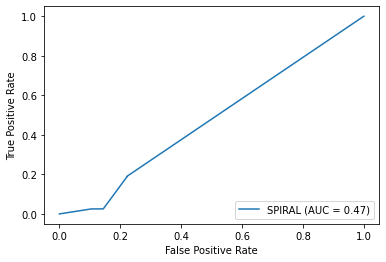

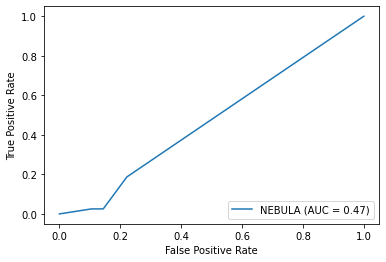

In [6]:
plot_ROC(laptop_path+'data/reconstruction_100000size_2novel_0.20tau_10gamma.json')

In [ ]:
tau = [0.1,0.2,0.3]
gamma = [num*50 for num in tau]

In [ ]:
gamma

In [ ]:
plot_ROC(laptop_path + '/data/reconstruction_100000size_2novel_%.2ftau_%.2fgamma.json'%(tau[1], gamma[1]))

In [ ]:
data = json.loads(open(laptop_path + 'data/reconstruction_100000size_2novel_%.2ftau_%.2fgamma.json'%(tau[0], gamma[0])).read())

In [ ]:
data['fhat_SPIRAL']

In [ ]:
from confusion_matrix import heatmap, annotate_heatmap
import sklearn

con_mat = sklearn.metrics.confusion_matrix(f_true,f_hat,normalize='true')
axlabels=['SV', 'Not SV']

fig, ax = plt.subplots()
im, cbar = heatmap(con_mat, axlabels, axlabels, ax=ax,cmap = 'Blues', cbarlabel="Probability")
plt.ylabel("Truth")
plt.xlabel("Prediction")
texts = annotate_heatmap(im, valfmt="{x:.3f}")